In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join, splitext
import skfuzzy as fuzz
from sklearn.cluster import KMeans

In [7]:
from os import listdir


input_dir = '../dataset/test'
output_dir = '../dataset/output'
gt_dir = '../dataset/groundtruth'
numImages = 80

onlyfiles = [f for f in listdir(input_dir) if isfile(join(input_dir, f))]
files = onlyfiles[0:numImages]

In [8]:
def showSubplotImage(img, titlestr=""):
    plt.imshow(img, cmap='gray', interpolation='bicubic', vmin=0, vmax=255)
    plt.xticks([]), plt.yticks([])
    plt.title(titlestr)
    plt.show()

def setSubplotImage(img, titlestr=""):
    n = len(img)  # Number of images
    
    if n <= 6:
        # If 6 or fewer images, show in a single row
        cols = n
        rows = 1
    else:
        # Otherwise, calculate rows and columns
        cols = int(np.ceil(np.sqrt(n)))
        rows = int(np.ceil(n / cols))

    # Create subplots
    fig, axs = plt.subplots(rows, cols, figsize=(15, 15))
    axs = axs.ravel()  # Flatten axes for easy indexing

    for i in range(n):
        axs[i].imshow(img[i], cmap='gray', vmin=0, vmax=255)
        axs[i].set_title(titlestr[i] if i < len(titlestr) else "")
        axs[i].axis('off')  # Turn off axes

    # Hide any unused subplots
    for i in range(n, len(axs)):
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()


In [9]:
import cv2
import numpy as np
import scipy
from sklearn.cluster import KMeans
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skimage.filters import frangi

def preprocess_image(image):

    # # Step 1: Extract the green channel
    green_channel = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))[1]

    # Step 2: Enhance contrast using CLAHE
    clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(8, 8))
    enhanced_img = clahe.apply(green_channel)

    # Step 3: Reduce noise with a median filter
    filtered_img = cv2.medianBlur(enhanced_img, 9)
    # filtered_img = scipy.ndimage.median_filter(enhanced_img, 3)

    return filtered_img

def kmeans_segmentation(data, image_shape, n_clusters=3):
 
    data = data.reshape(-1, 1).astype(np.float32)

    # Define criteria for the KMeans algorithm: (type, max_iter, epsilon)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

    # Perform KMeans clustering
    _, labels, _ = cv2.kmeans(data, n_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Reshape the labels back to the original image shape
    segmented_image = labels.reshape(image_shape)
    return segmented_image

def processImage (image):
    preprocessed_img = preprocess_image(image)

    setSubplotImage([preprocessed_img], ["Enhanced Image",])

    return preprocessed_img


def segment_retinal_vessels(image):

    preprocessed_img = preprocess_image(image)

    # Step 4: Apply KMeans clustering to segment the retinal vessels
    segmented_image = kmeans_segmentation(preprocessed_img, preprocessed_img.shape, n_clusters=3)   

    binary_mask = (segmented_image > 0).astype('float32')

    setSubplotImage([preprocessed_img, segmented_image, binary_mask], ["Enhanced Image", "Segmented Image", "Binary Mask"])

    return binary_mask



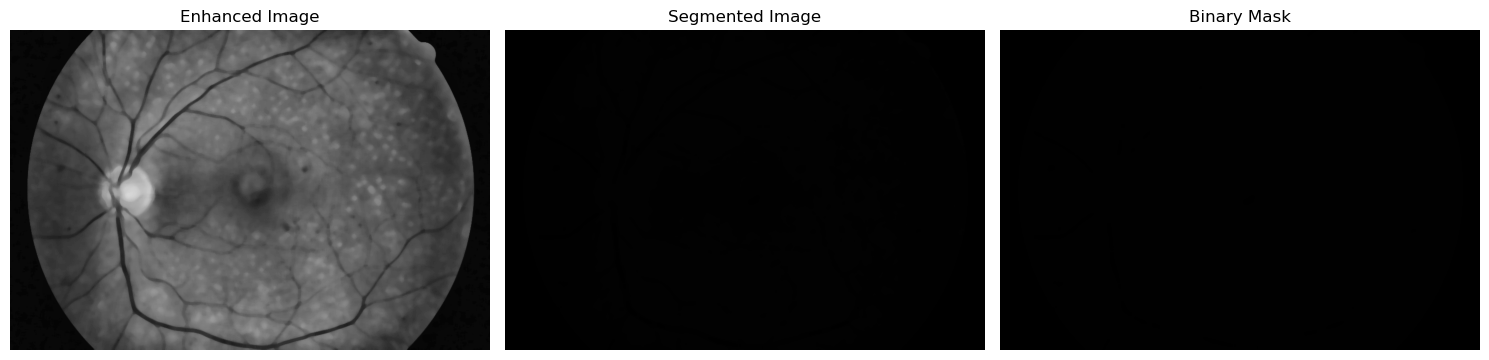

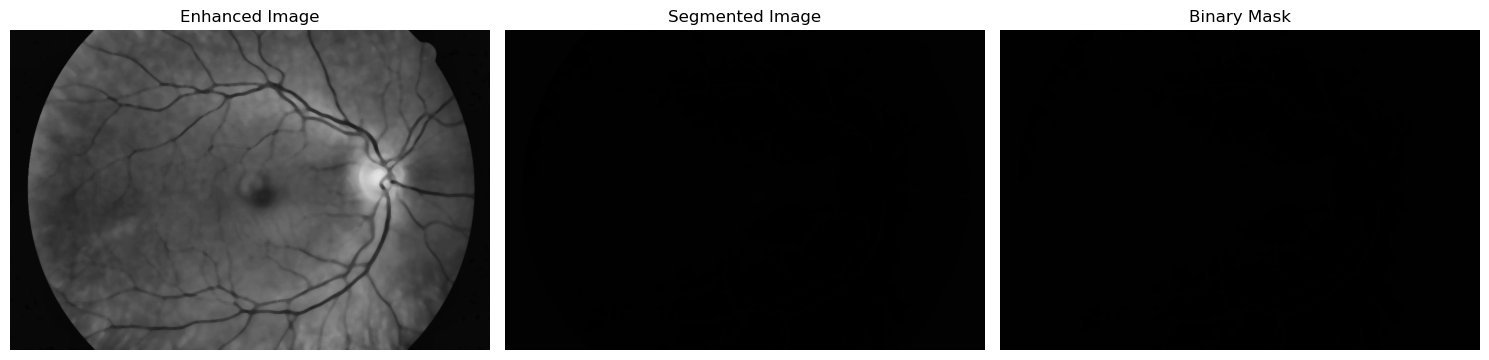

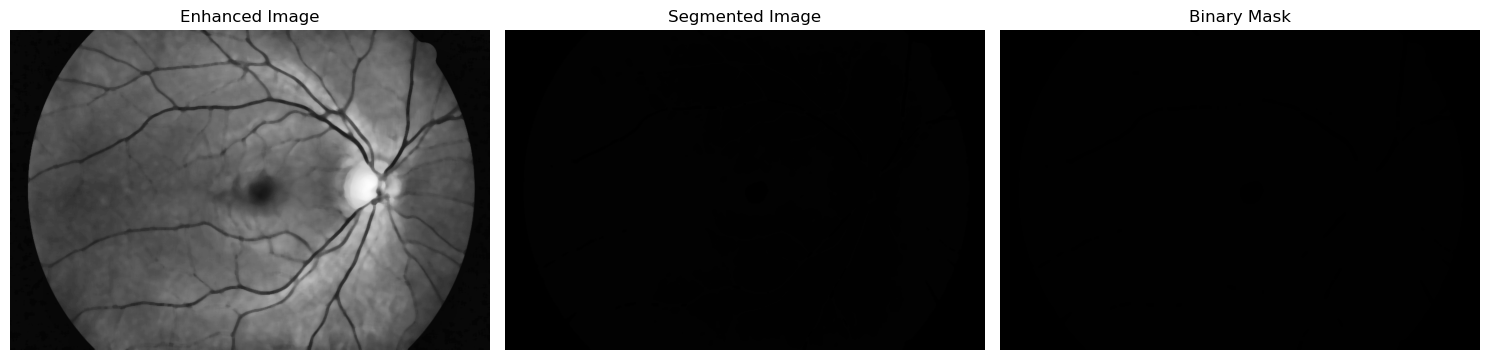

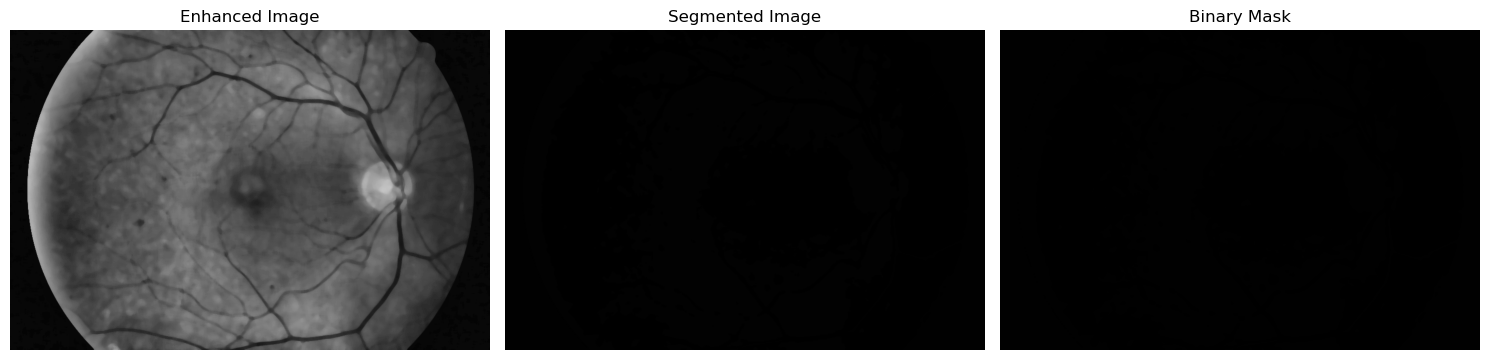

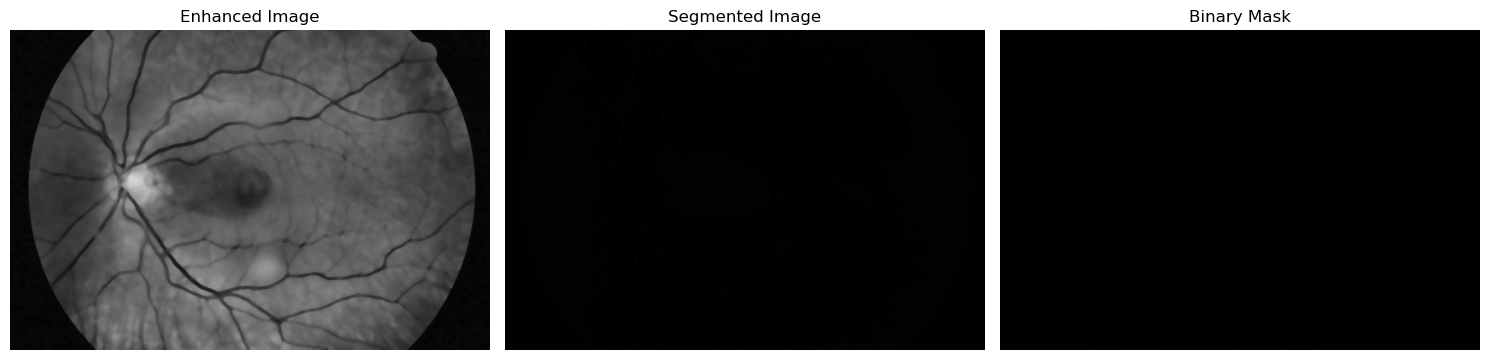

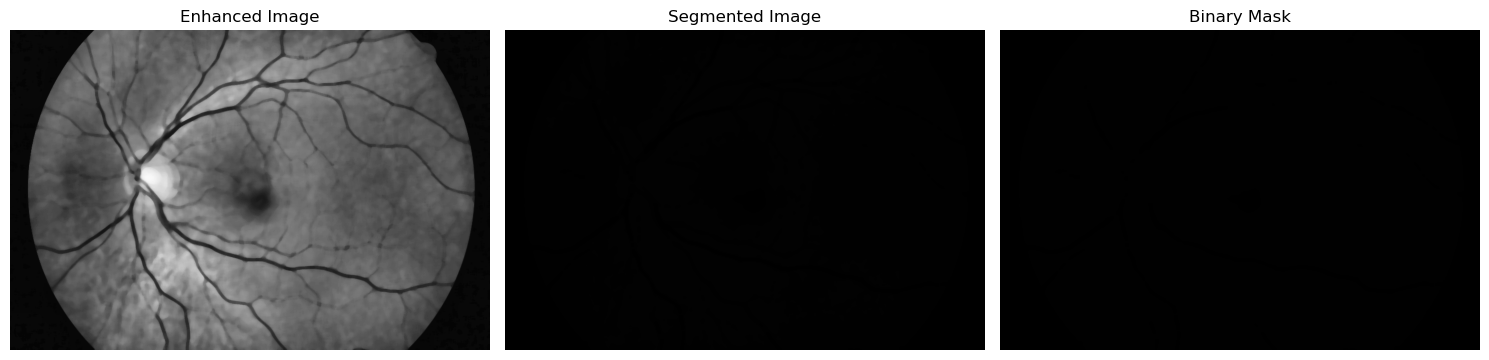

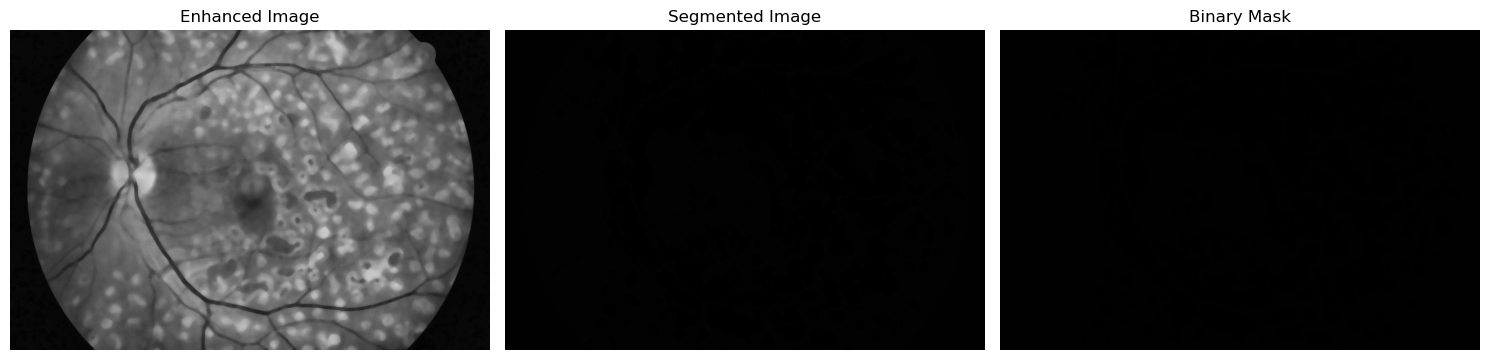

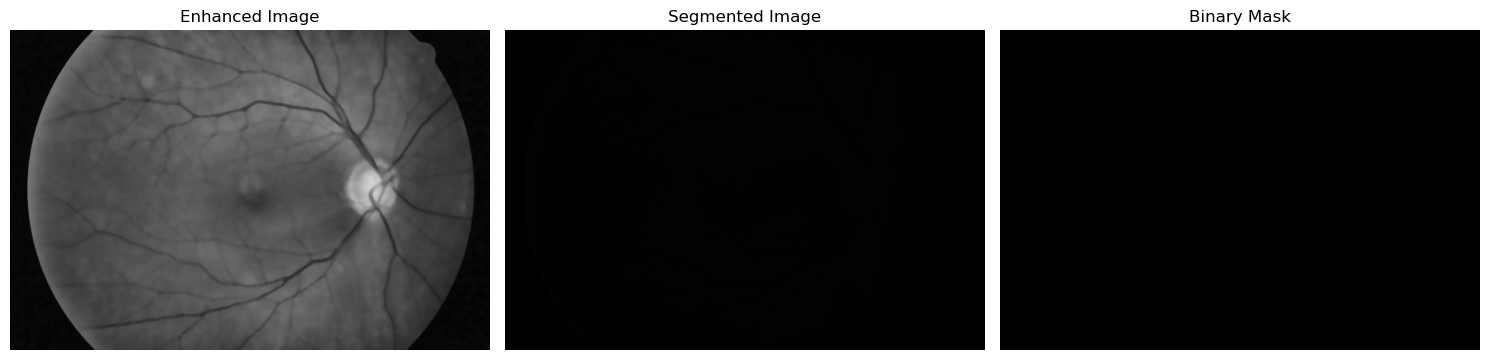

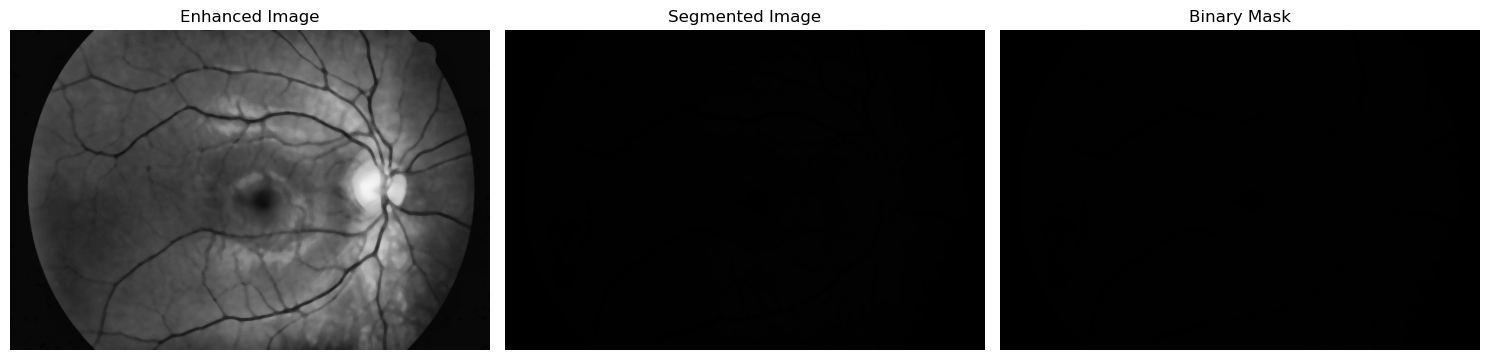

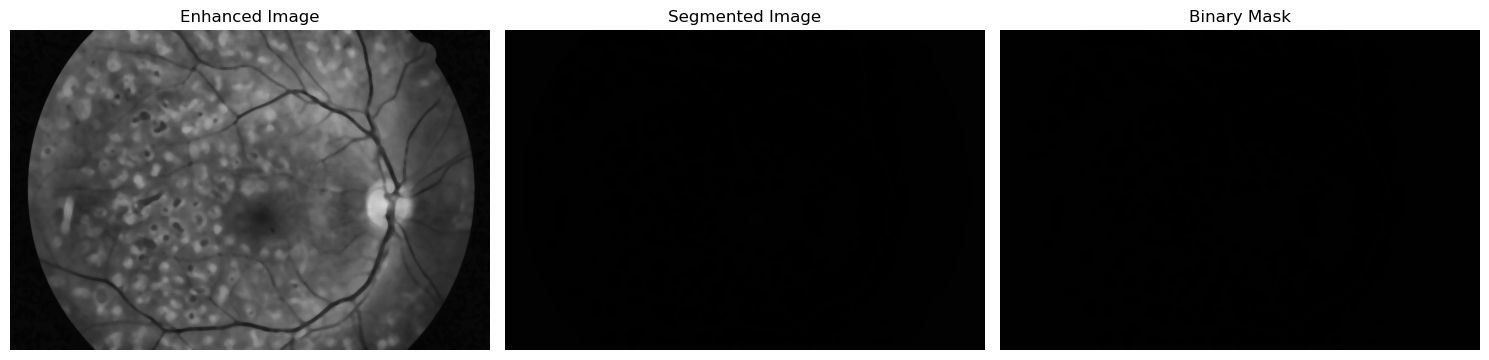

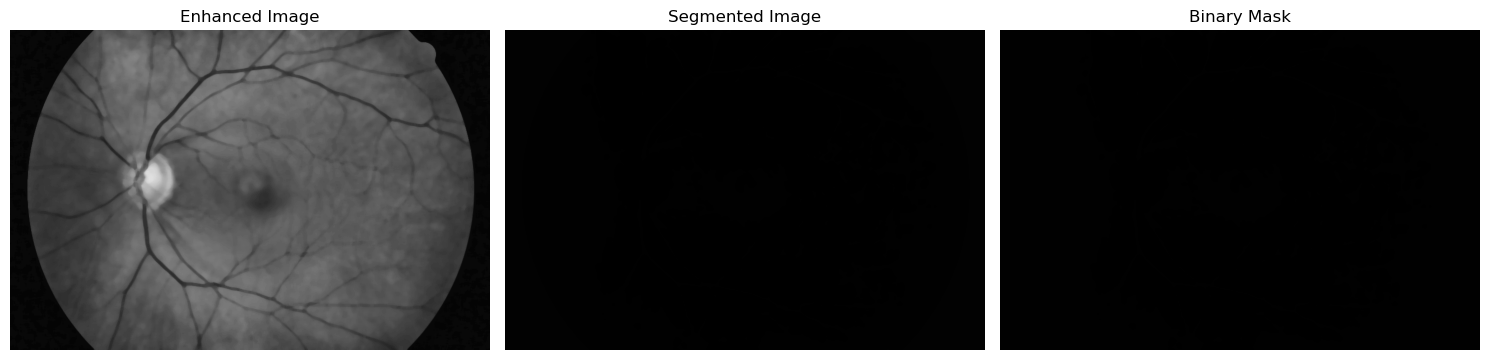

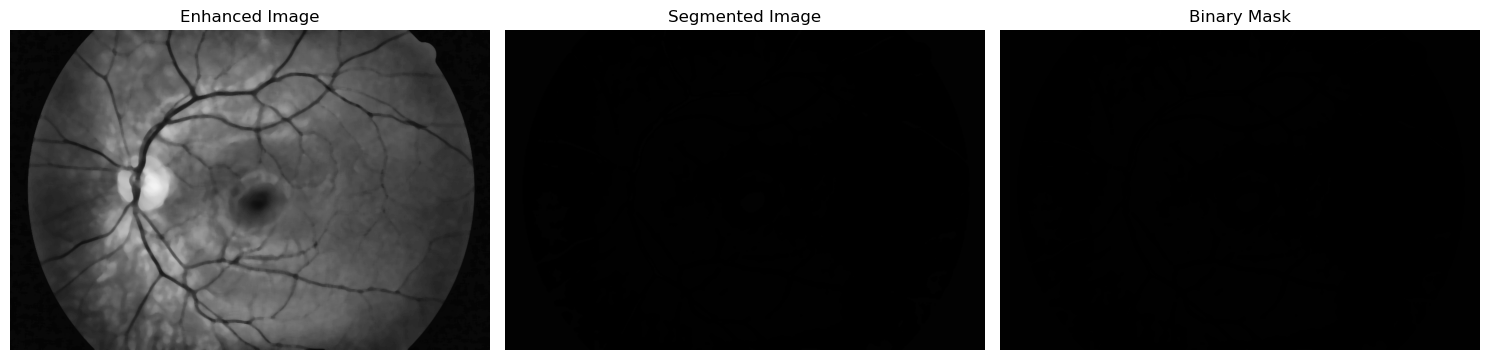

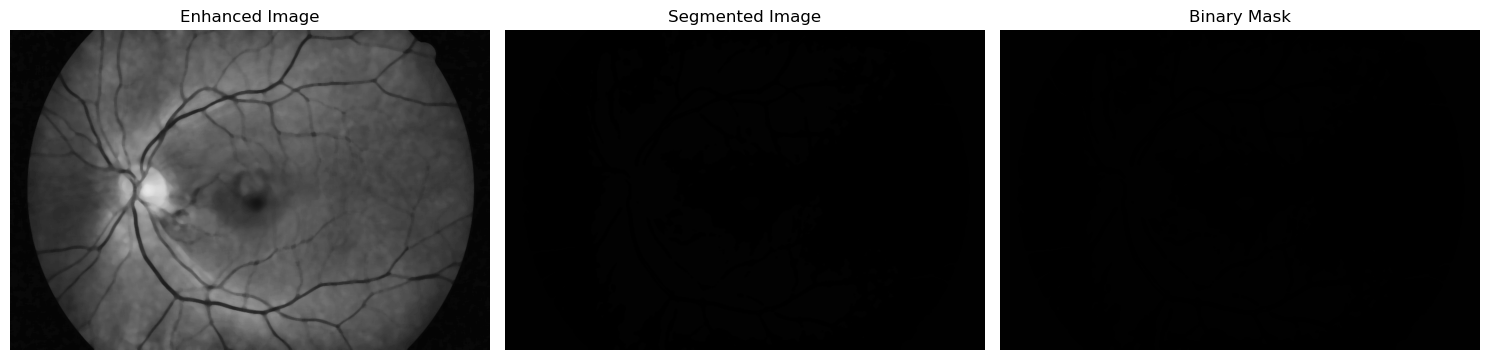

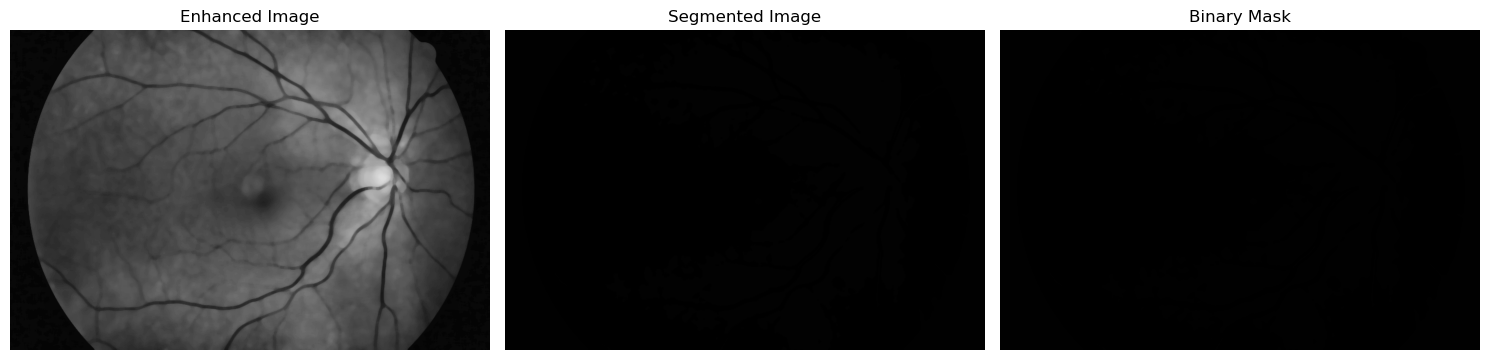

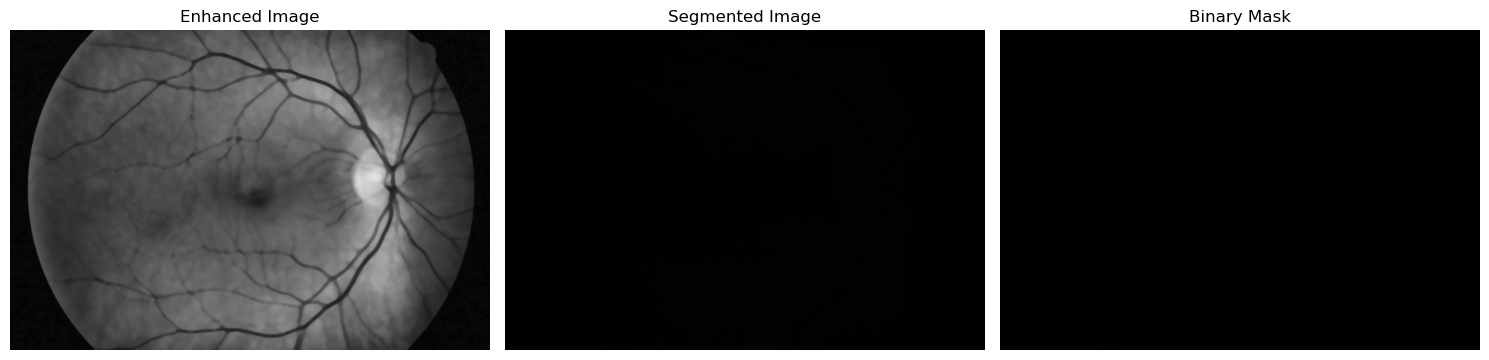

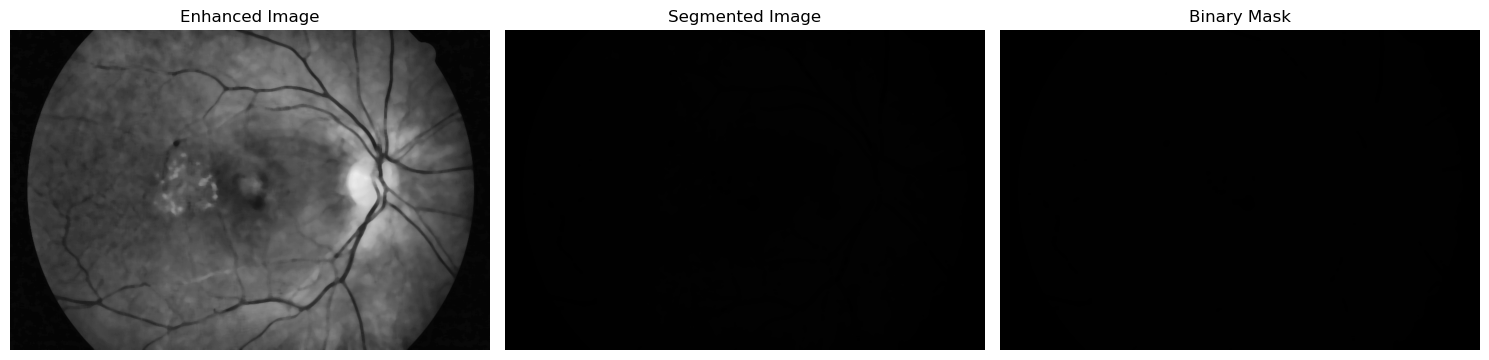

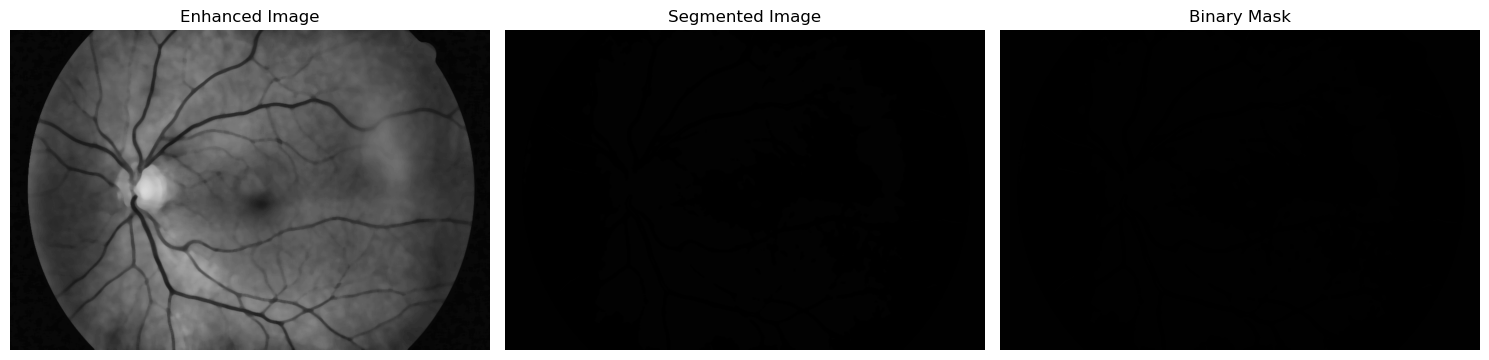

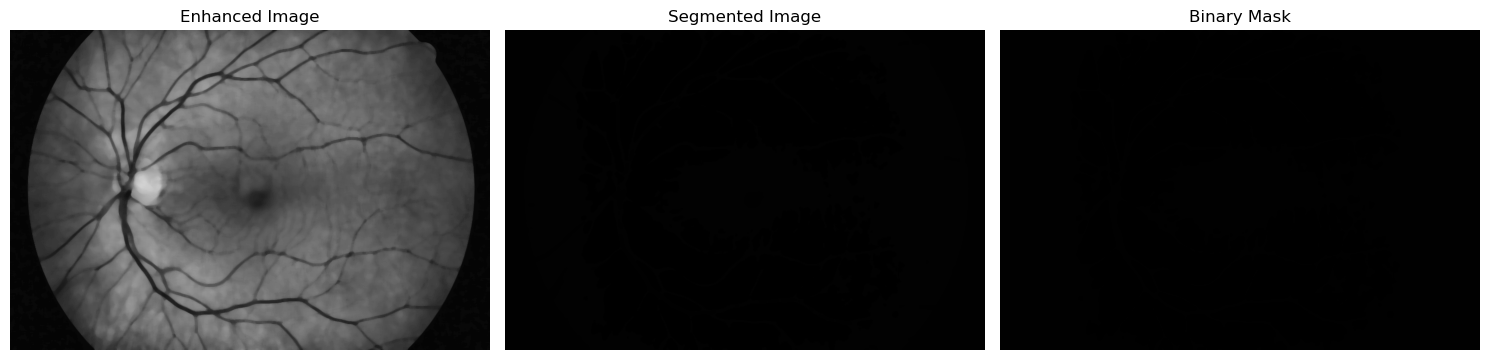

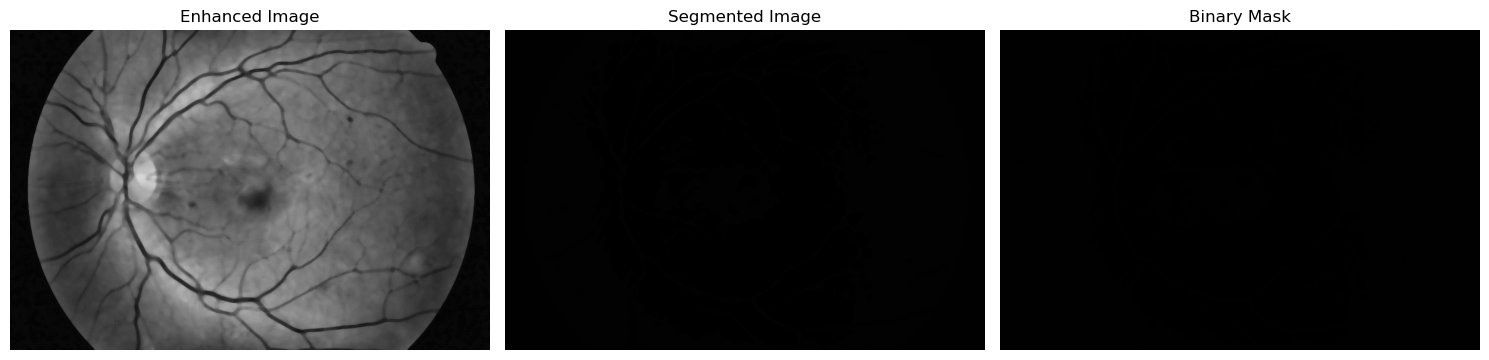

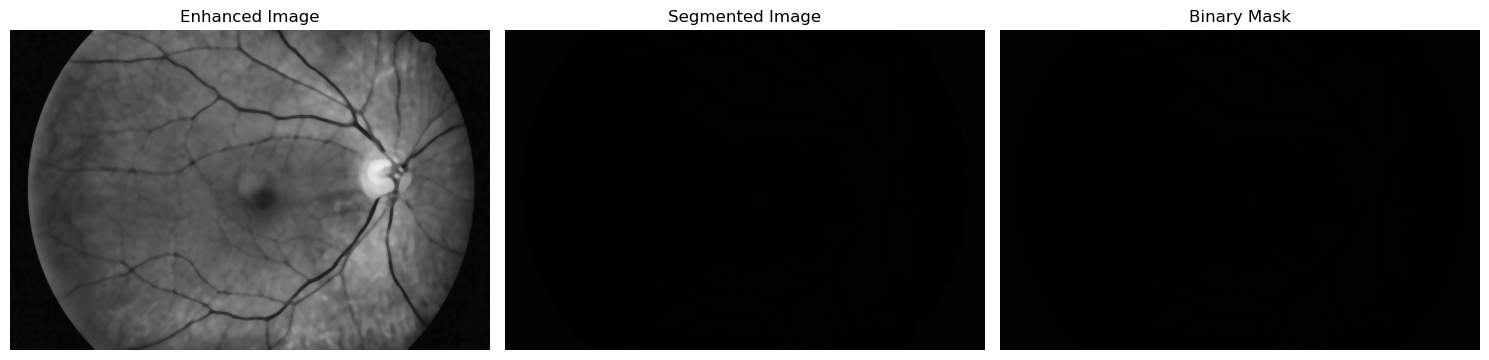

In [ ]:
for i,name in enumerate(files):
    inputImg = cv2.imread(input_dir + '/' + name)
    edge_binary = segment_retinal_vessels(inputImg)